In [1]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Data
data = pd.read_excel("Restaurant_Data.xlsx")

In [3]:
#importing country name with country code
country_code = pd.read_excel("Restaurant Country-Code.xlsx")
country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
#merging country name with data
new_data = pd.merge(data,country_code,on='Country Code', how='left')
new_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [5]:
#Checking shape of data
new_data.shape

(9551, 20)

In [6]:
#Checking Data information -- Column names & Data types
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [7]:
#Data columns have spaces in them, so we will replace them with '_' for preventing any problem
new_data.columns = new_data.columns.str.replace(' ','_')
new_data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [8]:
#Checking Null Values
print(new_data.isna().sum())

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64


we found 1 null value in Restaurant Name and 9 null values in Cuisines. we will fill that null value with mode of Cuisines column and drop Restaurant Name Null value

In [9]:
#Cheking mode value of Cuisines to replace with Null Value
new_data['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [10]:
#filling Null vallues with mode value -- North Indian
new_data['Cuisines'] = data['Cuisines'].fillna('North Indian')

In [11]:
#dropping Restaurant Name null value
new_data.dropna(inplace=True)

In [12]:
#checking shape
new_data.shape

(9550, 20)

In [13]:
#checking for null values if any left
new_data.isna().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

We have dropped Restaurant Name null value and filled Cuisines null values with mode of Cuisines.
Now we don't have any null values in data.

In [14]:
#checking duplicate records in the data if there are any
new_data.duplicated().sum()

0

there is no duplicate records in data

In [15]:
#Explore the geographical distribution of the restaurants and
#identify the cities with the maximum and minimum number of restaurants
country_dist=new_data.groupby(['Country_Code','Country']).agg(Count=('Restaurant_ID','count'))
country_dist.sort_values(by='Count',ascending=False)

,,Count
Country_Code,Country,
1,India,8651
216,United States,434
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


The above result shows that India has maximum number of restaurants whereas Canada has the minimum.

In [20]:
#grouping data by city wise
data_city = new_data.groupby(["Country","City"]).agg(No_of_Restaurant=("Restaurant_ID",'count'))
#City with max and min restaurant count
data_city.describe()

,No_of_Restaurant
count,141.000000
mean,67.730496
std,476.723952
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000


The above analysis show that the max value of restaurant in a city is 5473 Whereas the minimum value is 1

In [21]:
#sorting the cities by Number of restaurants
data_city.sort_values(by='No_of_Restaurant',ascending=False)

No_of_Restaurant
Country       City                            
India         New Delhi                   5473
              Gurgaon                     1118
              Noida                       1080
              Faridabad                    251
              Ghaziabad                     25
...                                        ...
              Panchkula                      1
Australia     Balingup                       1
Indonesia     Bandung                        1
Phillipines   Quezon City                    1
United States Winchester Bay                 1

[141 rows x 1 columns]

we can see that New Delhi has max no of restaurant 5473 where min restaurant is 1 and
there are multiple cities where are min restaurant

In [22]:
#Number of Cities with minimum restaurants
min_city_restaurant = data_city[data_city['No_of_Restaurant']==1]
print(min_city_restaurant)
print(min_city_restaurant.count())

                                No_of_Restaurant
Country       City                              
Australia     Armidale                         1
              Balingup                         1
              Beechworth                       1
              Dicky Beach                      1
              East Ballina                     1
              Flaxton                          1
              Forrest                          1
              Huskisson                        1
              Inverloch                        1
              Lakes Entrance                   1
              Lorn                             1
              Macedon                          1
              Mayfield                         1
              Middleton Beach                  1
              Montville                        1
              Palm Cove                        1
              Paynesville                      1
              Penola                           1
              Philli

we can see that there are 46 cities with only 1 restaurant in them

In [23]:
#Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

#grouping by Restaurant Name
data_franchising = new_data.groupby(["Restaurant_Name", "Country"]).agg(No_of_Franchise=("Restaurant_ID",'count'))
data_franchising

,,No_of_Franchise
Restaurant_Name,Country,
12212,India,1
Let's Burrrp,India,1
#45,India,1
#Dilliwaala6,India,1
#InstaFreeze,India,1
...,...,...
t Lounge by Dilmah,India,1
tashas,South Africa,1
wagamama,New Zealand,1


In [24]:
#sorting the cities by Number of Franchise
data_franchising.sort_values(by='No_of_Franchise',ascending=False).head(10)

,,No_of_Franchise
Restaurant_Name,Country,
Cafe Coffee Day,India,83
Domino's Pizza,India,79
Subway,India,63
Green Chick Chop,India,51
McDonald's,India,48
Keventers,India,34
Pizza Hut,India,29
Giani,India,29
Baskin Robbins,India,28


These are the top 10 restaurant that have most reastuarant presence

In [25]:
#creating dummy variable for table booking & online delivery
dummy=['Has_Table_booking','Has_Online_delivery']
new_data=pd.get_dummies(new_data,columns=dummy,drop_first=True)
new_data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [26]:
#Find the ratio between restaurants that allow table booking vs. those that do not allow table booking

table_booking = new_data[new_data['Has_Table_booking_Yes'] == 1]['Restaurant_ID'].count()
print('Allow Table bookintg - ',table_booking)

not_table_booking = new_data[new_data['Has_Table_booking_Yes'] == 0]['Restaurant_ID'].count()
print('Don\'t allow Table bookintg - ',not_table_booking)

print('Ratio between restaurants that allow table booking vs. those that do not allow table booking :',
      round((table_booking/not_table_booking),2))

Allow Table bookintg -  1158
Don't allow Table bookintg -  8392
Ratio between restaurants that allow table booking vs. those that do not allow table booking : 0.14


In [27]:
#Find out the percentage of restaurants providing online delivery

online_del = new_data[new_data['Has_Online_delivery_Yes'] == 1]['Restaurant_ID'].count()
print('Has Online Delivery - ',online_del)

not_online_del = new_data[new_data['Has_Online_delivery_Yes'] == 0]['Restaurant_ID'].count()
print('Don\'t have Online Delivery - ',not_online_del)

print('Percentage of restaurants providing online delivery :',
      round(((online_del/len(new_data))*100),1),'%')

Has Online Delivery -  2451
Don't have Online Delivery -  7099
Percentage of restaurants providing online delivery : 25.7 %


In [28]:
#Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

rest_del = new_data[new_data['Has_Online_delivery_Yes'] == 1]['Votes'].sum()
print('Votes for Restaurant that deliver - ',rest_del)

res_not_del = new_data[new_data['Has_Online_delivery_Yes'] == 0]['Votes'].sum()
print('Votes for Restaurant that don\'t deliver - ',res_not_del)

print('Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver :',
      abs(rest_del-res_not_del))

Votes for Restaurant that deliver -  517914
Votes for Restaurant that don't deliver -  979962
Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver : 462048


In [29]:
#What are the top 10 cuisines served across cities?
list_cuisines = []
for i in new_data.Cuisines.str.split(','):
    list_cuisines.extend(i)
s = pd.Series([i.strip() for i in list_cuisines])
s

0             Italian
1         Continental
2               Asian
3          Indonesian
4             Western
             ...     
19710         Italian
19711       Beverages
19712     Street Food
19713         Chinese
19714    North Indian
Length: 19715, dtype: object

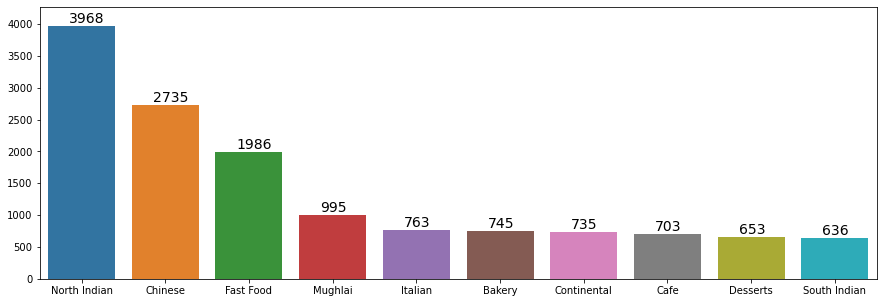

In [30]:
plt.figure(figsize = (15,5))
sns.barplot(x = s.value_counts()[:10].index, y = s.value_counts()[:10] )
for i in range(10):
    plt.annotate(s.value_counts()[i], xy = (i-0.15,s.value_counts()[i]+50),fontsize = 14)
plt.ylim(0, round(s.value_counts()[0]+300))
plt.show()

In [31]:
#What is the maximum and minimum no. of cuisines that a restaurant serves?
new_data['no_cuisines'] = new_data.Cuisines.str.split(',').apply(len)
new_data

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes,no_cuisines
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0,3
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0,2
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0,1
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",...,Indian Rupees(Rs.),1,4.3,Green,Very Good,63,India,0,0,3
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",...,Indian Rupees(Rs.),1,3.6,Yellow,Good,34,India,0,0,3
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",...,Indian Rupees(Rs.),1,3.9,Yellow,Good,127,India,0,0,6
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,...,Indian Rupees(Rs.),1,3.8,Yellow,Good,78,India,0,0,1


C:\Users\might\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


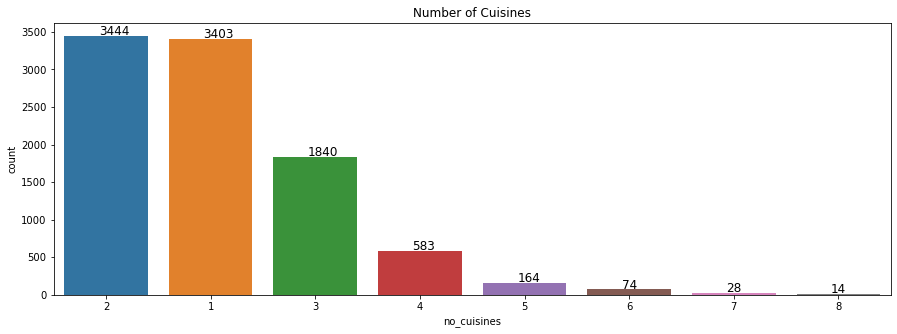

In [32]:
plt.figure(figsize = (15,5))
vc = new_data.no_cuisines.value_counts()
sns.countplot('no_cuisines', data=new_data, order = vc.index)
for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy = (i-0.07,vc.iloc[i]+10), fontsize = 12)
plt.title("Number of Cuisines")
plt.show()

The minimum and maximum number of cuisines that restaurant serves is 1 and 8

In [33]:
#Which is the most served cuisine across the restaurant for each city?
cuisines = new_data['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [34]:
#renaming column names
cuisines.columns =['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.head()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#concatinating cuisines to data
cuisines_data = pd.concat([new_data,cuisines],axis=1)
cuisines_data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Online_delivery_Yes,no_cuisines,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,0,2,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,0,3,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,0,2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,0,1,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,0,2,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#making new dataframe with cities
cuisine_loc = pd.DataFrame(cuisines_data[['Country','City','Locality_Verbose','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                          'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
cuisine_loc

,Country,City,Locality_Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Indonesia,Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,Jakarta,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Jakarta,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,Jakarta,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9546,India,Dehradun,"Jakhan, Dehradun",Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,India,Kanpur,"Mall Road, Kanpur",Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,India,Kanpur,"Parade, Kanpur",Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,India,Varanasi,"Dashaswmedh Road, Varanasi",Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#stacking columns
cuisine_loc_stack = pd.DataFrame(cuisine_loc.stack())

In [38]:
#melting data with cuisine
keys = [c for c in cuisine_loc if c.startswith('Cuisine')]
a=pd.melt(cuisine_loc, id_vars='Locality_Verbose', value_vars=keys,value_name='Cuisines')

In [63]:
#melting the stack into one row
max_rate=pd.DataFrame(a.groupby(by=['Locality_Verbose','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate
del max_rate['variable']
max_rate.columns=['Locality_Verbose','Cuisines','Count']
max_rate.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [44]:
#find the highest restuarant in the city
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality_Verbose'],as_index=False).first()
loc.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


In [45]:
rating_res=loc.merge(new_data,left_on='Locality_Verbose',right_on='Locality_Verbose',how='inner')

#inner join to merge the two dataframe
df=pd.DataFrame(rating_res[['Country','City','Locality_Verbose','Cuisines_x','Count']])

#making a dataframe of rating restaurant
country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()

#grouping the data by country code
con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']

#renaming the columns
con1=con.sort_values('Number of restaurants in the country', ascending=False)

#sorting the restaurants on the basis of the number of restaurants in the country
con1[:10]
final_con=con1.drop(con1.index[[7,10]])

In [46]:
final_con

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,48
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Japanese,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Cape Town,Green Point,Grill,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2
0,Australia,Victor Harbor,Victor Harbor,Coffee and Tea,1


In [47]:
#converting the series to dataframe
loc_list=final_con['City']
a_list=loc_list.tolist()
print(a_list)

# converting the series to dataframe
cui_list=final_con['Cuisines']
b_list=cui_list.tolist()
print(b_list)

# converting the series to dataframe
count_list=final_con['Number of restaurants in the country']
c_list=count_list.tolist()
print(c_list)

['New Delhi', 'Dubuque', 'Wellington City', 'Rio de Janeiro', 'Mandaluyong City', 'Singapore', 'Cape Town', 'Ankara', 'Abu Dhabi', 'Victor Harbor', 'Vineland Station', 'Jakarta', 'Doha']
['North Indian', 'American', 'Cafe', 'Brazilian', 'Japanese', 'Seafood', 'Grill', 'World Cuisine', 'American', 'Coffee and Tea', 'Italian', 'Western', 'Thai']
[48, 9, 5, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1]


In [48]:
rest_cuisines = pd.DataFrame(cuisines_data[['Restaurant_Name','City','Cuisine_1',
                                           'Cuisine_2','Cuisine_3','Cuisine_4',
                                           'Cuisine_5','Cuisine_6','Cuisine_7',
                                           'Cuisine_8']])
rest_cuisines_stack=pd.DataFrame(rest_cuisines.stack()) #stacking the columns
rest_cuisines.head()

,Restaurant_Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cuisines_keys = [c for c in rest_cuisines if c.startswith('Cuisine')]
b = pd.melt(rest_cuisines, id_vars='Restaurant_Name', value_vars=keys,value_name='Cuisines')
#melting the stack into one row
max_rate1 = pd.DataFrame(b.groupby(by=['Restaurant_Name','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant_Name','Cuisines','Count']
max_rate1.head(20)

,Restaurant_Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [56]:
sorted_data = new_data
sorted_data = sorted_data.merge(max_rate1,left_on='Restaurant_Name',right_on='Restaurant_Name',how='left')
sorted_data

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines_x,...,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes,no_cuisines,Cuisines_y,Count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,4.1,Green,Very Good,1498,Indonesia,0,0,2,Italian,1
1,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,4.1,Green,Very Good,1498,Indonesia,0,0,2,Continental,1
2,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,4.6,Dark Green,Excellent,873,Indonesia,0,0,3,Asian,1
3,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,4.6,Dark Green,Excellent,873,Indonesia,0,0,3,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,4.6,Dark Green,Excellent,873,Indonesia,0,0,3,Western,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",...,3.9,Yellow,Good,127,India,0,0,6,Italian,1
23811,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",...,3.9,Yellow,Good,127,India,0,0,6,Beverages,1
23812,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,...,3.8,Yellow,Good,78,India,0,0,1,Street Food,1
23813,18246202,VNS Live Studio,1,Varanasi,"Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...",Sigra,"Sigra, Varanasi",82.991694,25.318345,"Chinese, North Indian",...,3.5,Yellow,Good,109,India,0,0,2,Chinese,1


C:\Users\might\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


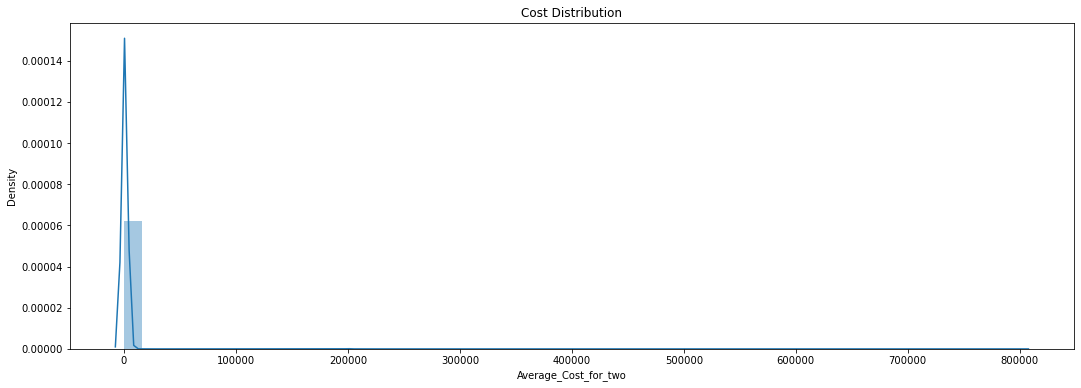

In [47]:
#Distribution of Avg Cost for Two
plt.figure(figsize=(18,6))
sns.distplot(new_data['Average_Cost_for_two'])
plt.title('Cost Distribution')
plt.show()

The distribution of cost across the restaurants is skewed to the left.

,no_cuisines,Aggregate_rating
no_cuisines,1.000000,0.249271
Aggregate_rating,0.249271,1.000000


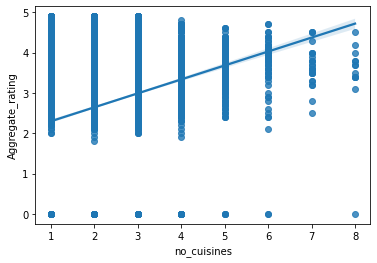

In [57]:
sns.regplot(x='no_cuisines',y='Aggregate_rating',data=new_data)
new_data[["no_cuisines", "Aggregate_rating"]].corr()
#Number of cuisines is a good factor to decide the rating of a restaurant

,Average_Cost_for_two,Aggregate_rating
Average_Cost_for_two,1.000000,0.051797
Aggregate_rating,0.051797,1.000000


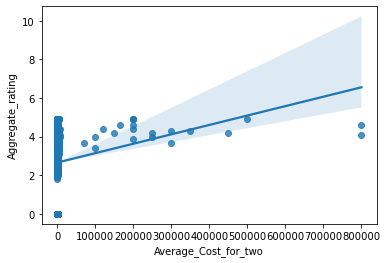

In [58]:
sns.regplot(x='Average_Cost_for_two',y='Aggregate_rating',data=new_data)
new_data[["Average_Cost_for_two", "Aggregate_rating"]].corr()
#Average cost for two is a weak positive factor to decide the rating of a restaurant

,Votes,Aggregate_rating
Votes,1.000000,0.313598
Aggregate_rating,0.313598,1.000000


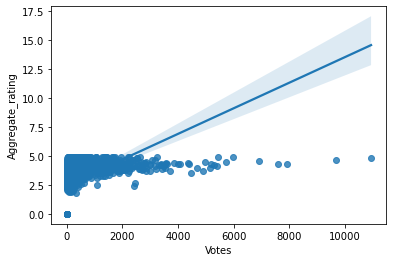

In [59]:
sns.regplot(x='Votes',y='Aggregate_rating',data=new_data)
new_data[['Votes','Aggregate_rating']].corr()
##Average cost for two can be a factor to decide the rating of a restaurant

,Price_range,Aggregate_rating
Price_range,1.000000,0.437874
Aggregate_rating,0.437874,1.000000


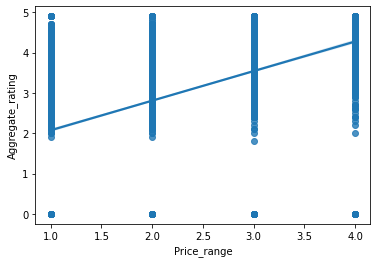

In [60]:
sns.regplot(x='Price_range',y='Aggregate_rating',data=new_data)
new_data[['Price_range','Aggregate_rating']].corr()
##Price range can be a factor to decide the rating of a restaurant

,Has_Table_booking_Yes,Aggregate_rating
Has_Table_booking_Yes,1.000000,0.190045
Aggregate_rating,0.190045,1.000000


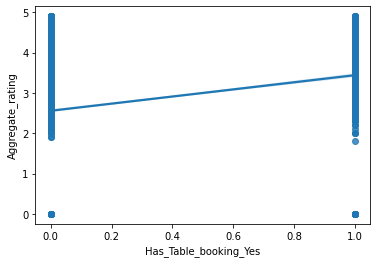

In [61]:
sns.regplot(x='Has_Table_booking_Yes',y='Aggregate_rating',data=new_data)
new_data[['Has_Table_booking_Yes','Aggregate_rating']].corr()
##Table booking can be a factor to decide the rating of a restaurant

We have see that there is no single variable that affects the rating strongly, however table booking, online delivery, avg price for two and price range, number of votes do play a part in affecting the rating of a restaurant.

In [64]:
#removing white spaces in cuisines column
sorted_data["Cuisines_y"] = sorted_data["Cuisines_y"].str.strip(inplace=True)
#exporting data to xls file for dashboard
sorted_data.to_excel("Restaurant_Data_Sorted.xls",index=False)

C:\Users\might\AppData\Local\Temp\ipykernel_17288\2585693100.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sorted_data.to_excel("Restaurant_Data_Sorted_Test.xls",index=False)


In [43]:
rest_data=pd.read_excel("Restaurant_Data_Sorted.xls")

In [44]:
rest_data

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines_x,...,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes,no_cuisines,Cuisines_y,Count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,4.1,Green,Very Good,1498,Indonesia,0,0,2,Italian,1
1,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,4.1,Green,Very Good,1498,Indonesia,0,0,2,Continental,1
2,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,4.6,Dark Green,Excellent,873,Indonesia,0,0,3,Asian,1
3,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,4.6,Dark Green,Excellent,873,Indonesia,0,0,3,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,4.6,Dark Green,Excellent,873,Indonesia,0,0,3,Western,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",...,3.9,Yellow,Good,127,India,0,0,6,Italian,1
23811,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",...,3.9,Yellow,Good,127,India,0,0,6,Beverages,1
23812,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,...,3.8,Yellow,Good,78,India,0,0,1,Street Food,1
23813,18246202,VNS Live Studio,1,Varanasi,"Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...",Sigra,"Sigra, Varanasi",82.991694,25.318345,"Chinese, North Indian",...,3.5,Yellow,Good,109,India,0,0,2,Chinese,1
